# Seaborn 


## What is Seaborn?

Seaborn is a Python data visualization library built on top of Matplotlib and closely integrated with pandas data structures. It provides a high-level interface for drawing attractive and informative statistical graphics with fewer lines of code.

**Key points:**
- Designed for statistical plots and exploring relationships in datasets.
- Works well with pandas DataFrames.
- Offers attractive default styles and color palettes.

**Creator & history:**
- Seaborn was created by **Michael Waskom**. Development began around 2012 and it has grown into one of the most popular visualization libraries for exploratory data analysis in Python.

---

## Installation

Install using pip or conda:

```bash
pip install seaborn
# or
conda install -c conda-forge seaborn
```


## Basic imports and theme
This cell shows the typical imports and how to set Seaborn's theme for consistent styling across plots.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a theme (style + color palette)
sns.set_theme(style='darkgrid', palette='deep')

print('Seaborn version:', sns.__version__)


Seaborn version: 0.13.2


## Built-in example datasets
Seaborn ships with several datasets (tips, iris, flights, titanic, mpg) useful for demos. Use `sns.load_dataset(name)` to fetch them.

In [14]:
# Load a few example datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Relational plots
`relplot`, `scatterplot`, and `lineplot` are used to visualize relationships between variables.

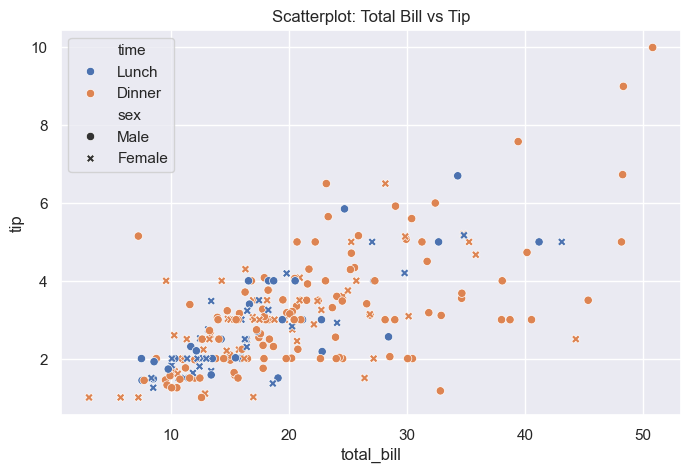

In [21]:
# Scatterplot example
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex', )
ax.set_title('Scatterplot: Total Bill vs Tip')
plt.show()


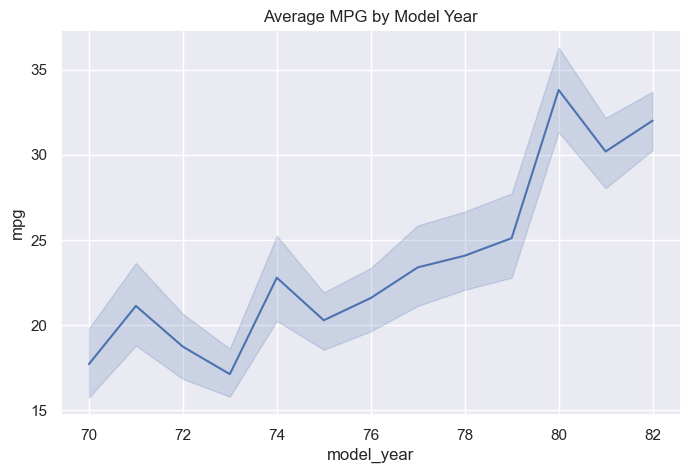

In [22]:
# Lineplot example with aggregated data
plt.figure(figsize=(8,5))
mpg = sns.load_dataset('mpg').dropna()
ax = sns.lineplot(data=mpg, x='model_year', y='mpg', estimator='mean')
ax.set_title('Average MPG by Model Year')
plt.show()


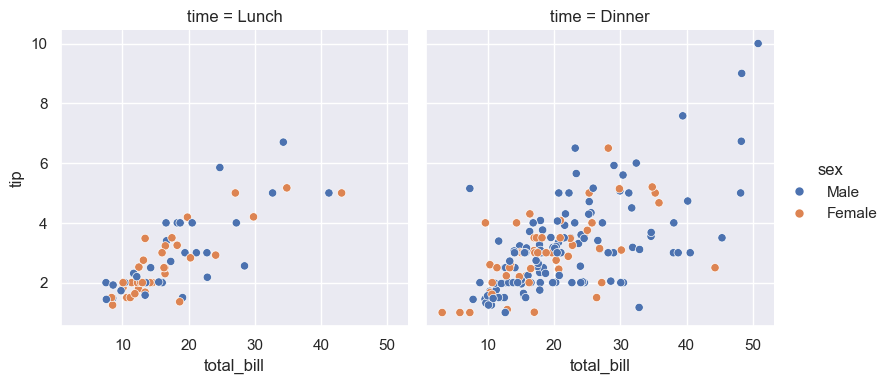

In [23]:
# relplot creates a FacetGrid for relational plots
sns.relplot(data=tips, x='total_bill', y='tip', col='time', hue='sex', height=4)
plt.show()


## Categorical plots
Useful for showing distributions across categories: `boxplot`, `violinplot`, `stripplot`, `swarmplot`, `barplot`, `countplot`, `catplot`.

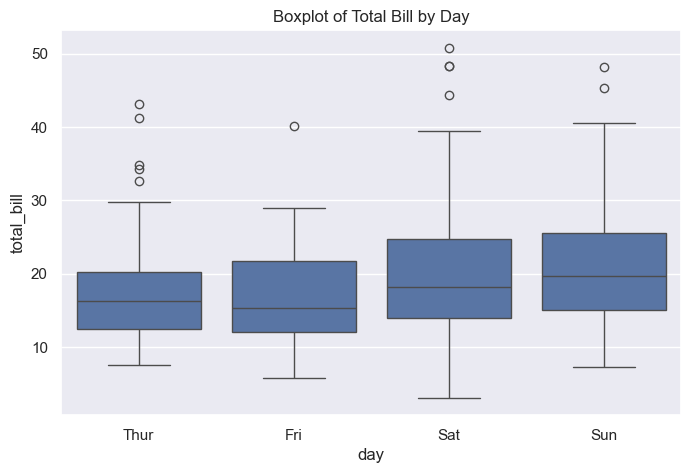

In [24]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=tips, x='day', y='total_bill')
ax.set_title('Boxplot of Total Bill by Day')
plt.show()


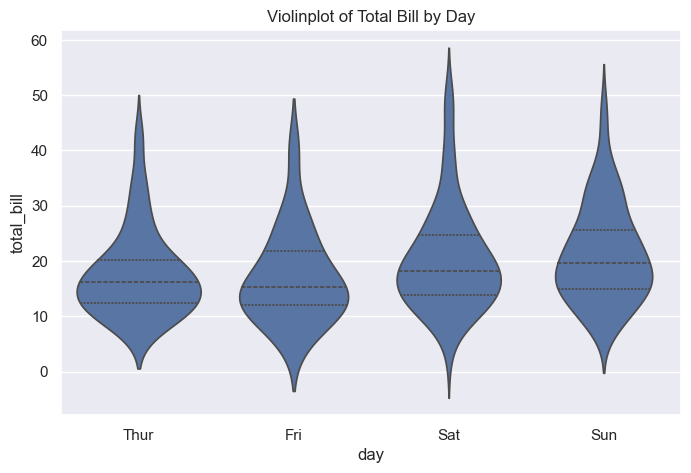

In [29]:
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=tips, x='day', y='total_bill', inner='quartile')
ax.set_title('Violinplot of Total Bill by Day')
plt.show()

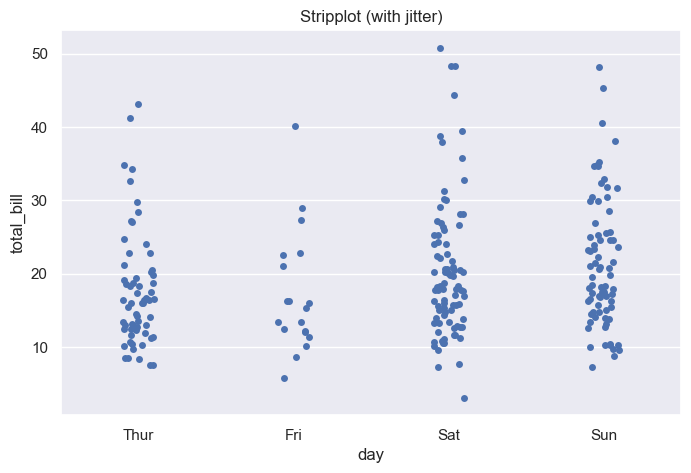

In [30]:
plt.figure(figsize=(8,5))
ax = sns.stripplot(data=tips, x='day', y='total_bill', jitter=True)
ax.set_title('Stripplot (with jitter)')
plt.show()


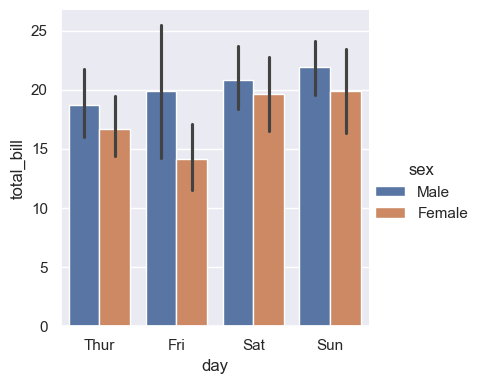

In [31]:
# catplot as a figure-level interface (combines faceting + categorical plotting)
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='bar', height=4)
plt.show()


## Distribution plots
`histplot`, `kdeplot`, `displot`, `rugplot`, and `ecdfplot` help visualize univariate or bivariate distributions.

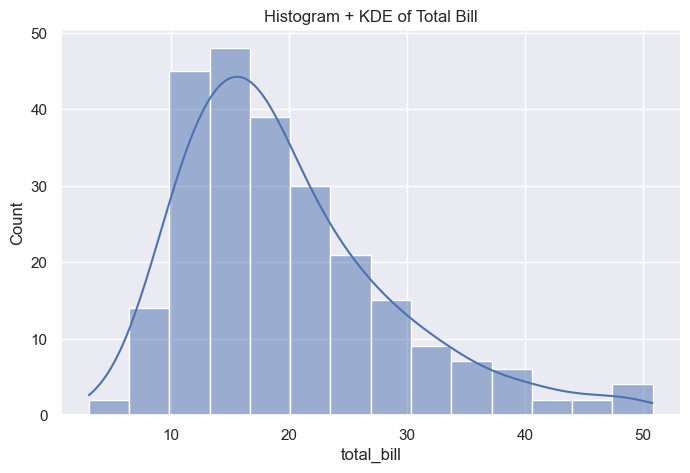

In [32]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=tips, x='total_bill', kde=True)
ax.set_title('Histogram + KDE of Total Bill')
plt.show()


In [ ]:
# KDE + rug
plt.figure(figsize=(8,4))
ax = sns.kdeplot(data=tips, x='total_bill', fill=True)
ax.set_title('KDE of Total Bill')
plt.show()


In [ ]:
# displot (figure-level) with facets
sns.displot(data=tips, x='total_bill', col='time', kde=True, height=4)
plt.show()


## Regression plots
`regplot` and `lmplot` perform linear regression fits and show confidence intervals.

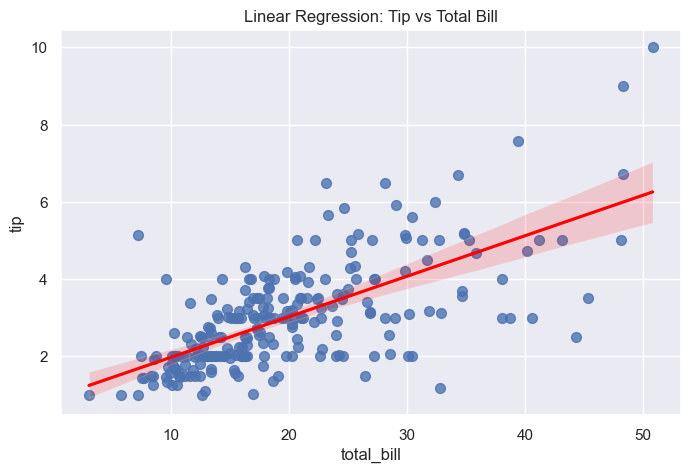

In [33]:
plt.figure(figsize=(8,5))
ax = sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'s':50}, line_kws={'color':'red'})
ax.set_title('Linear Regression: Tip vs Total Bill')
plt.show()


In [ ]:
# lmplot (figure-level) with hue
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', height=5)
plt.show()


## Matrix plots
`heatmap` and `clustermap` help visualize matrices (correlations, confusion matrices, tables).

In [ ]:
# Correlation heatmap example
plt.figure(figsize=(8,6))
cor = tips.corr()
sns.heatmap(cor, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix (tips)')
plt.show()


In [ ]:
# Flights dataset pivot heatmap
flight_pivot = flights.pivot('month','year','passengers')
plt.figure(figsize=(10,6))
sns.heatmap(flight_pivot, annot=True, fmt='d')
plt.title('Flights passengers by month/year')
plt.show()


## Pairplot and PairGrid
`pairplot` creates a grid of relationships while `PairGrid` gives lower-level control.

In [ ]:
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pairplot of Iris dataset', y=1.02)
plt.show()


In [ ]:
# PairGrid example with different plots in upper/lower
pg = sns.PairGrid(iris.drop(columns=['species']))
pg.map_upper(sns.scatterplot)
pg.map_lower(sns.kdeplot)
pg.map_diag(sns.histplot)
plt.show()


## Jointplot
`jointplot` shows a bivariate plot with marginals (histogram, KDE, scatter, hex).

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.show()


## FacetGrid
`FacetGrid` lets you map plots to subsets of data by row/col/hue.

In [ ]:
# Example: distribution of total_bill by day in separate panels
fg = sns.FacetGrid(tips, col='day', height=3)
fg.map(sns.histplot, 'total_bill')
plt.show()


## Styling, contexts, and color palettes
Seaborn provides `set_style`, `set_context`, `color_palette`, and helpers like `despine` for polished visuals.

In [ ]:
# Styles and contexts
sns.set_style('whitegrid')
sns.set_context('talk')

# Show a palette
sns.palplot(sns.color_palette('viridis', 6))
plt.title('Viridis palette example')
plt.show()

# Remove top/right spines
sns.despine()


## Saving figures and recommended practices
- Use `plt.figure(figsize=(w,h))` or figure-level functions' `height`/`aspect`.
- Save with `plt.savefig('figure.png', dpi=300, bbox_inches='tight')`.

Example:

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True)
plt.title('Save this figure example')
plt.savefig('seaborn_example_total_bill.png', dpi=150, bbox_inches='tight')
print('Saved seaborn_example_total_bill.png in the current working directory')


## Advanced: customizing plots using Matplotlib
Since Seaborn is built on Matplotlib, you can tweak axes, titles, annotations, and subplots using Matplotlib APIs.

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=tips, x='day', y='total_bill', ax=ax)
ax.set_title('Boxplot with Matplotlib customization')
ax.set_xlabel('Day of week')
ax.set_ylabel('Total bill ($)')
ax.annotate('Highest median', xy=(3,50), xytext=(2.2,55), arrowprops=dict(arrowstyle='->'))
plt.show()


## Quick reference: common Seaborn functions

- Relational: `relplot`, `scatterplot`, `lineplot`
- Categorical: `catplot`, `boxplot`, `violinplot`, `stripplot`, `swarmplot`, `barplot`, `countplot`
- Distribution: `histplot`, `kdeplot`, `displot`, `ecdfplot`
- Regression: `regplot`, `lmplot`
- Matrix: `heatmap`, `clustermap`
- Multi-plot grids: `pairplot`, `PairGrid`, `FacetGrid`, `jointplot`

Each function has parameters to control `hue`, `size`, `style`, and `kind` (where applicable).